In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


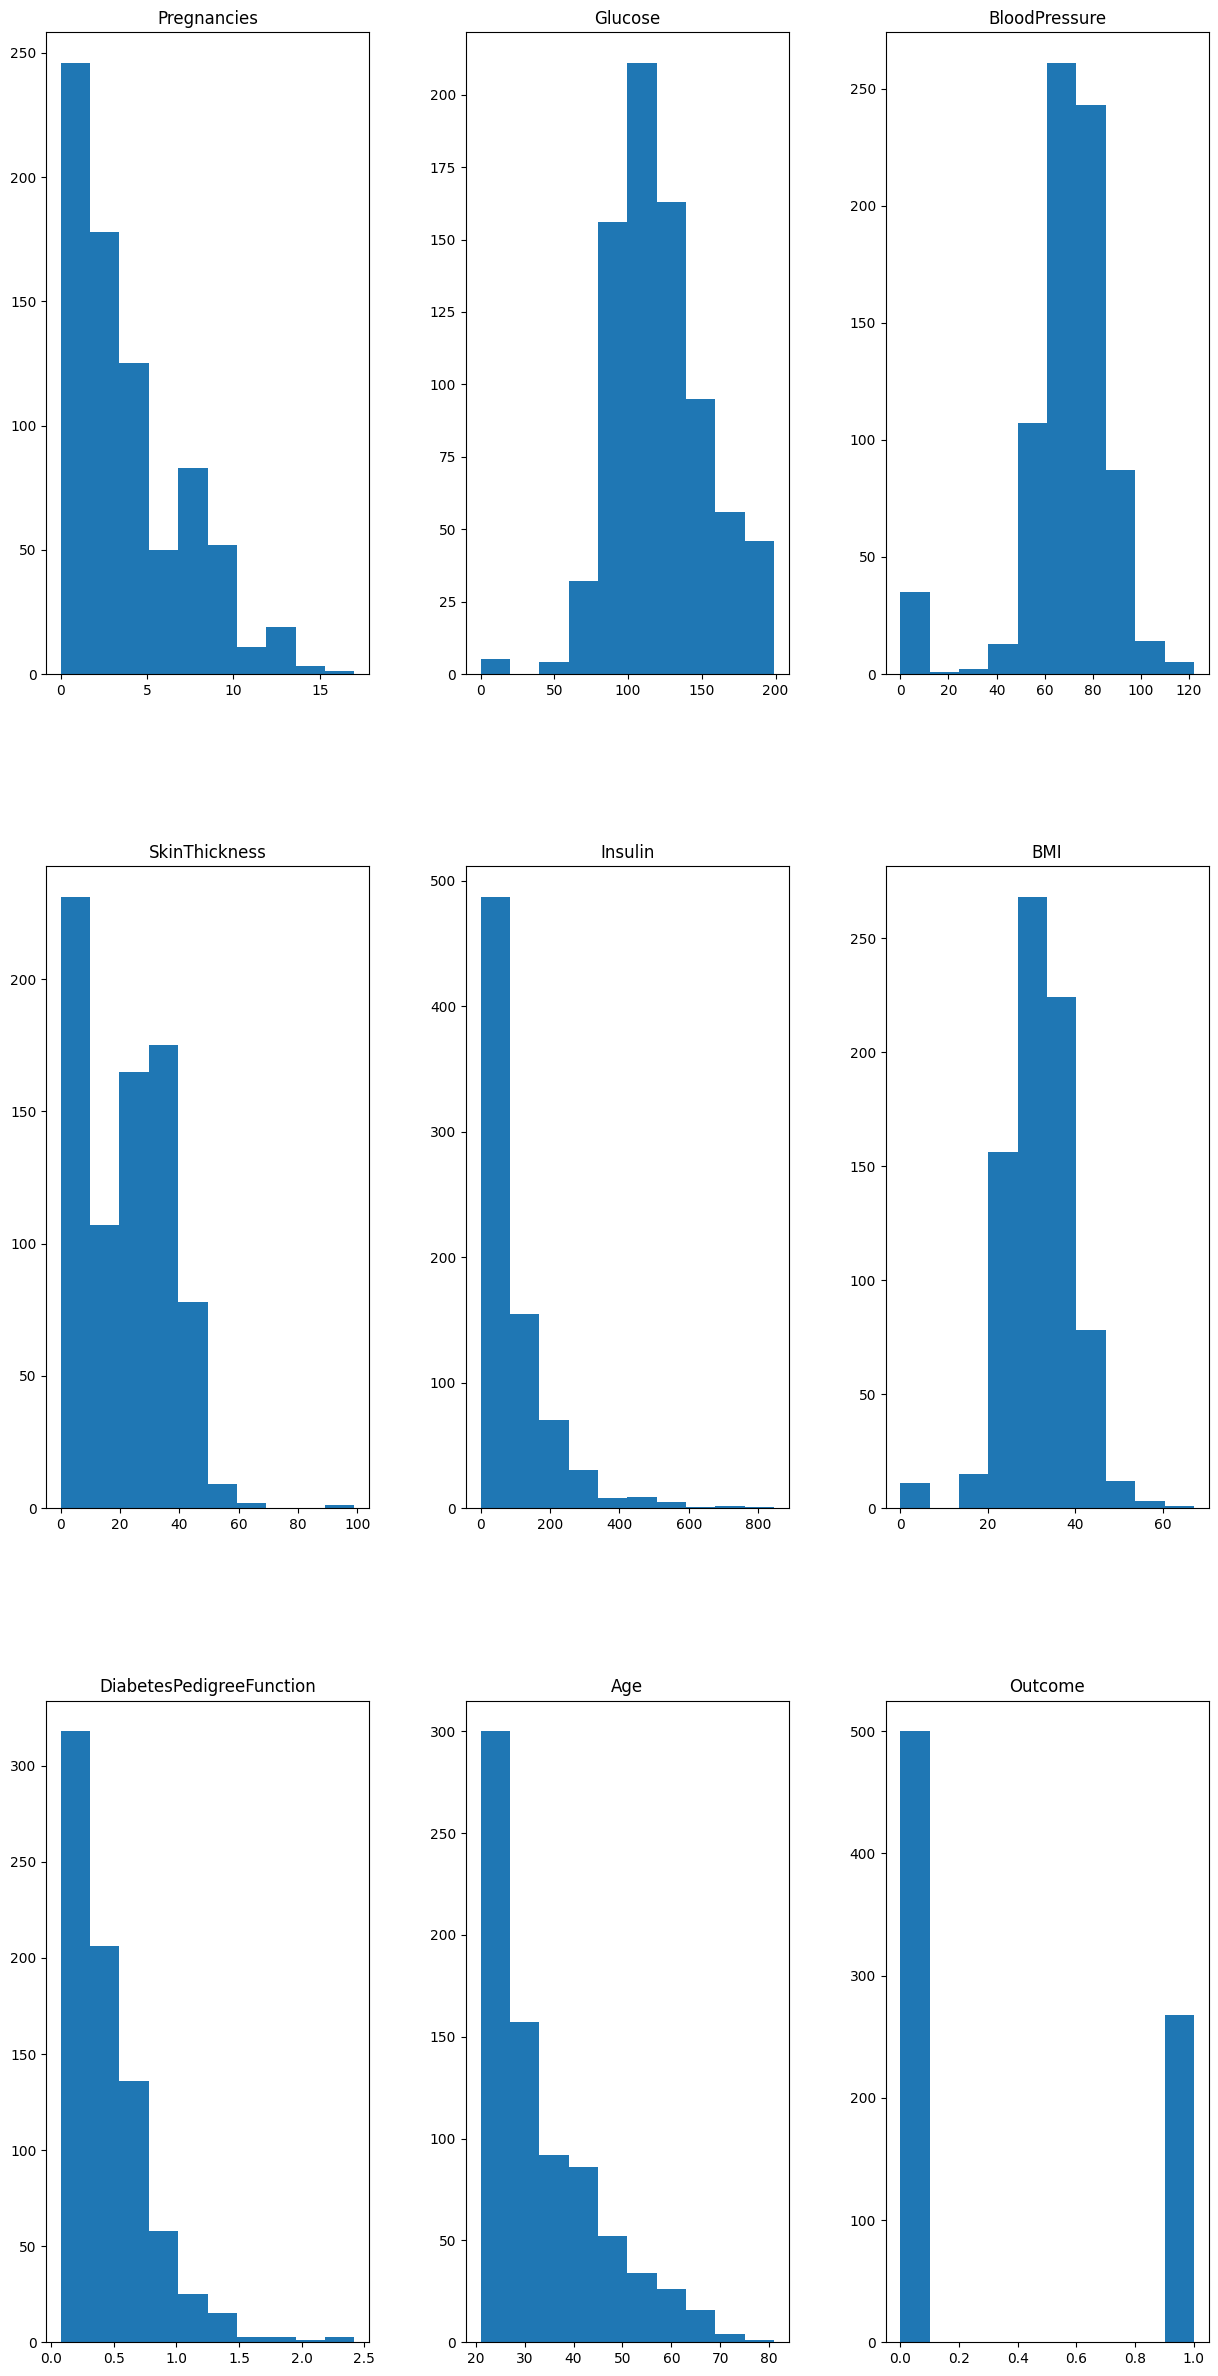

In [7]:
df.hist(figsize=(15,30), sharex=False, sharey=False, grid=False)
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

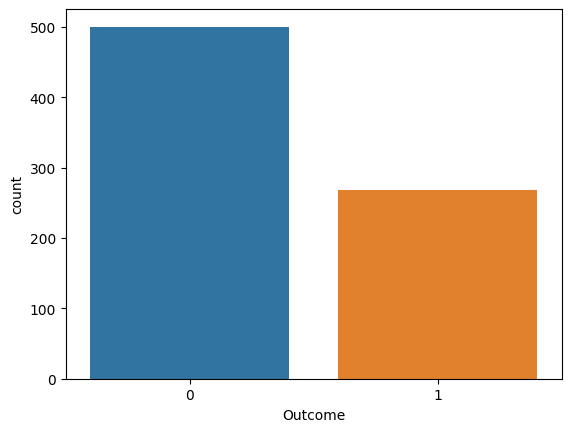

In [8]:
sns.countplot(x="Outcome",data=df)

In [9]:
#sns.pairplot(df,diag_kind="kde",hue="Outcome")

In [10]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [11]:
df.Glucose=df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness=df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin=df.Insulin.replace(0,df.Insulin.mean())

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [13]:
### Approach 1

In [14]:
X=df.drop("Outcome", axis=1)
Y=df[["Outcome"]]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
nb_model=GaussianNB()

In [17]:
nb_model.fit(X_train,Y_train)

GaussianNB()

In [18]:
nb_model.score(X_train,Y_train)

0.7560521415270018

In [19]:
nb_model.score(X_test,Y_test)

0.7402597402597403

### Approach 2

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [22]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [24]:
nb_model_stand=GaussianNB()

In [25]:
nb_model_stand.fit(X_train,Y_train)

GaussianNB()

In [26]:
nb_model_stand.score(x_train,y_train)

0.6443202979515829

In [27]:
nb_model_stand.score(x_test,y_test)

0.6536796536796536